# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

# Setting

In [73]:
pd.set_option("display.max_rows", None)  # 모든 행 출력
pd.set_option("display.max_columns", None)  # 모든 열 출력
rc('font', family='AppleGothic')
pd.options.display.float_format = '{:.4f}'.format


# plt.rcParams['font.family'] = 'AppleGothic'  # 또는 'Malgun Gothic' (Windows 사용자)
plt.rcParams['axes.unicode_minus'] = False   # 음수 기호 깨짐 방지

# Data

In [4]:
file_path = '/Users/toad/Documents/ToyProject/LG_Aimers_Infertility/'


In [5]:
train = pd.read_csv(file_path + 'Data/train.csv').drop(columns=['ID'])
test = pd.read_csv(file_path + 'Data/test.csv').drop(columns=['ID'])

In [6]:
categorical_columns = [
    "시술 시기 코드","시술 당시 나이","시술 유형","특정 시술 유형","배란 자극 여부","배란 유도 유형","단일 배아 이식 여부","착상 전 유전 검사 사용 여부","착상 전 유전 진단 사용 여부","남성 주 불임 원인","남성 부 불임 원인","여성 주 불임 원인",
    "여성 부 불임 원인","부부 주 불임 원인","부부 부 불임 원인","불명확 불임 원인","불임 원인 - 난관 질환","불임 원인 - 남성 요인","불임 원인 - 배란 장애","불임 원인 - 여성 요인","불임 원인 - 자궁경부 문제","불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도","불임 원인 - 정자 면역학적 요인","불임 원인 - 정자 운동성","불임 원인 - 정자 형태","배아 생성 주요 이유","총 시술 횟수","클리닉 내 총 시술 횟수","IVF 시술 횟수","DI 시술 횟수","총 임신 횟수","IVF 임신 횟수",
    "DI 임신 횟수","총 출산 횟수","IVF 출산 횟수","DI 출산 횟수","난자 출처","정자 출처","난자 기증자 나이","정자 기증자 나이","동결 배아 사용 여부","신선 배아 사용 여부","기증 배아 사용 여부","대리모 여부","PGD 시술 여부","PGS 시술 여부"
]

In [7]:
numeric_columns = [
    "임신 시도 또는 마지막 임신 경과 연수","총 생성 배아 수","미세주입된 난자 수","미세주입에서 생성된 배아 수","이식된 배아 수","미세주입 배아 이식 수","저장된 배아 수","미세주입 후 저장된 배아 수","해동된 배아 수","해동 난자 수","수집된 신선 난자 수",
    "저장된 신선 난자 수","혼합된 난자 수","파트너 정자와 혼합된 난자 수","기증자 정자와 혼합된 난자 수","난자 채취 경과일","난자 해동 경과일","난자 혼합 경과일","배아 이식 경과일","배아 해동 경과일"
]

In [8]:
print(f'Columns : {train.columns.values}')
print(f'Shape : {train.shape}')
print(f'Null : {train.isnull().sum().to_string()}')

Columns : ['시술 시기 코드' '시술 당시 나이' '임신 시도 또는 마지막 임신 경과 연수' '시술 유형' '특정 시술 유형'
 '배란 자극 여부' '배란 유도 유형' '단일 배아 이식 여부' '착상 전 유전 검사 사용 여부' '착상 전 유전 진단 사용 여부'
 '남성 주 불임 원인' '남성 부 불임 원인' '여성 주 불임 원인' '여성 부 불임 원인' '부부 주 불임 원인'
 '부부 부 불임 원인' '불명확 불임 원인' '불임 원인 - 난관 질환' '불임 원인 - 남성 요인' '불임 원인 - 배란 장애'
 '불임 원인 - 여성 요인' '불임 원인 - 자궁경부 문제' '불임 원인 - 자궁내막증' '불임 원인 - 정자 농도'
 '불임 원인 - 정자 면역학적 요인' '불임 원인 - 정자 운동성' '불임 원인 - 정자 형태' '배아 생성 주요 이유'
 '총 시술 횟수' '클리닉 내 총 시술 횟수' 'IVF 시술 횟수' 'DI 시술 횟수' '총 임신 횟수' 'IVF 임신 횟수'
 'DI 임신 횟수' '총 출산 횟수' 'IVF 출산 횟수' 'DI 출산 횟수' '총 생성 배아 수' '미세주입된 난자 수'
 '미세주입에서 생성된 배아 수' '이식된 배아 수' '미세주입 배아 이식 수' '저장된 배아 수' '미세주입 후 저장된 배아 수'
 '해동된 배아 수' '해동 난자 수' '수집된 신선 난자 수' '저장된 신선 난자 수' '혼합된 난자 수'
 '파트너 정자와 혼합된 난자 수' '기증자 정자와 혼합된 난자 수' '난자 출처' '정자 출처' '난자 기증자 나이'
 '정자 기증자 나이' '동결 배아 사용 여부' '신선 배아 사용 여부' '기증 배아 사용 여부' '대리모 여부'
 'PGD 시술 여부' 'PGS 시술 여부' '난자 채취 경과일' '난자 해동 경과일' '난자 혼합 경과일' '배아 이식 경과일'
 '배아 해동 경과일' '임신 성공 여부']
Shape : (256351, 68)
Null : 시술 시기 코드                      0
시술 당시 나

In [9]:
train.head()

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,0회,1회,0회,0회,0회,0회,0회,0회,0회,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,1회,1회,0회,0회,0회,0회,0회,0회,0회,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


# EDA

### Target Distribution

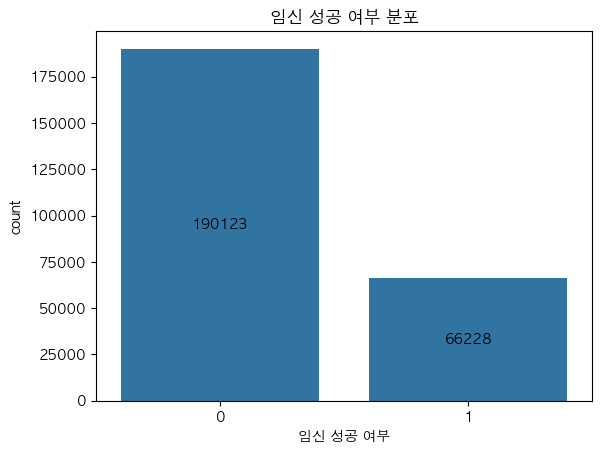

In [9]:
ax = sns.countplot(x=train['임신 성공 여부'], )
for bar in ax.containers:
    ax.bar_label(bar, fmt='%d', label_type='center', fontsize=10, fontweight='bold')
plt.title('임신 성공 여부 분포')
plt.show()

### Variable distribution

In [10]:
train.describe()

,임신 시도 또는 마지막 임신 경과 연수,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
count,9370.000000,256351.000000,250060.000000,2718.0,250060.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.0,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,250060.000000,250060.000000,250060.00000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,2179.0,1929.0,198863.0,1436.000000,202616.000000,212785.000000,40369.000000,256351.000000
mean,9.270651,0.771286,0.233476,1.0,0.012781,0.028516,0.013115,0.030724,0.012432,0.033068,0.008765,0.250730,0.138704,0.372403,0.130392,0.0,0.000039,0.071394,0.001077,0.000004,0.000378,0.000558,5.061145,4.170799,2.84365,1.368156,0.724718,1.185975,0.612933,0.454571,0.046401,8.563717,0.093418,7.698928,7.107326,0.534728,0.160465,0.840342,0.009830,0.004195,1.0,1.0,0.0,0.001393,0.005385,3.254741,0.045629,0.258349
std,3.550313,0.420005,0.423043,0.0,0.112328,0.166441,0.113767,0.172568,0.110805,0.178814,0.093212,0.433434,0.345638,0.483446,0.336734,0.0,0.006246,0.257483,0.032795,0.001975,0.019449,0.023612,4.664337,5.625943,4.09464,0.771961,0.894352,2.502318,1.842522,1.415320,0.688246,7.317230,1.105882,6.451914,6.532466,2.509487,0.367038,0.366289,0.098656,0.064633,0.0,0.0,0.0,0.037307,0.111504,1.715697,0.418672,0.437728
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,2.000000,0.000000,0.000000
50%,9.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,7.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,3.000000,0.000000,0.000000
75%,11.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,7.000000,5.00000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,13.000000,0.000000,11.000000,11.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,5.000000,0.000000,1.000000
max,20.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,51.000000,51.000000,43.00000,3.000000,3.000000,51.000000,51.000000,32.000000,36.000000,51.000000,51.000000,51

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 68 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   시술 시기 코드               256351 non-null  object 
 1   시술 당시 나이               256351 non-null  object 
 2   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 3   시술 유형                  256351 non-null  object 
 4   특정 시술 유형               256349 non-null  object 
 5   배란 자극 여부               256351 non-null  int64  
 6   배란 유도 유형               256351 non-null  object 
 7   단일 배아 이식 여부            250060 non-null  float64
 8   착상 전 유전 검사 사용 여부       2718 non-null    float64
 9   착상 전 유전 진단 사용 여부       250060 non-null  float64
 10  남성 주 불임 원인             256351 non-null  int64  
 11  남성 부 불임 원인             256351 non-null  int64  
 12  여성 주 불임 원인             256351 non-null  int64  
 13  여성 부 불임 원인             256351 non-null  int64  
 14  부부 주 불임 원인             256351 non-nu

In [12]:
print(f'Null : {train.isnull().sum()}')

Null : 시술 시기 코드                      0
시술 당시 나이                      0
임신 시도 또는 마지막 임신 경과 연수    246981
시술 유형                         0
특정 시술 유형                      2
배란 자극 여부                      0
배란 유도 유형                      0
단일 배아 이식 여부                6291
착상 전 유전 검사 사용 여부         253633
착상 전 유전 진단 사용 여부           6291
남성 주 불임 원인                    0
남성 부 불임 원인                    0
여성 주 불임 원인                    0
여성 부 불임 원인                    0
부부 주 불임 원인                    0
부부 부 불임 원인                    0
불명확 불임 원인                     0
불임 원인 - 난관 질환                 0
불임 원인 - 남성 요인                 0
불임 원인 - 배란 장애                 0
불임 원인 - 여성 요인                 0
불임 원인 - 자궁경부 문제               0
불임 원인 - 자궁내막증                 0
불임 원인 - 정자 농도                 0
불임 원인 - 정자 면역학적 요인            0
불임 원인 - 정자 운동성                0
불임 원인 - 정자 형태                 0
배아 생성 주요 이유                6291
총 시술 횟수                       0
클리닉 내 총 시술 횟수                 0
IVF 시술 횟수                     0
D

In [13]:
train.head()

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,4.0,5.0,4.0,2.0,2.0,2.0,2.0,0.0,0.0,7.0,0.0,5.0,5.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,0회,1회,0회,0회,0회,0회,0회,0회,0회,5.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,7.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,현재 시술용,1회,1회,1회,0회,0회,0회,0회,0회,0회,0회,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,4.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,현재 시술용,0회,0회,0회,0회,0회,0회,0회,0회,0회,0회,6.0,6.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,7.0,0.0,6.0,6.0,0.0,본인 제공,배우자 제공,알 수 없음,알 수 없음,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


# Preprocessing

### categorical 변수 처리

In [10]:
from sklearn.preprocessing import  OrdinalEncoder

ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
x_train_encoded = train.copy()
x_train_encoded[categorical_columns] = ordinal_encoder.fit_transform(train[categorical_columns])

x_test_encoded = test.copy()
x_test_encoded[categorical_columns] = ordinal_encoder.transform(test[categorical_columns])

In [11]:
x_train_encoded['배아 생성 주요 이유'].value_counts()

배아 생성 주요 이유
12.0    233732
9.0       9192
4.0       3784
5.0       1959
0.0       1108
2.0        125
10.0        83
1.0         44
3.0         20
6.0          6
8.0          5
11.0         1
7.0          1
Name: count, dtype: int64

In [107]:
x_train_encoded[x_train_encoded['특정 시술 유형'].isnull()]

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
31571,2.0,0.0,NaN,1.0,NaN,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,6.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
175847,3.0,0.0,NaN,1.0,NaN,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,6.0,0.0,1.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0


In [108]:
print(train.isnull().sum().values.sum(), x_train_encoded.isnull().sum().values.sum())

1767007 1767007


In [109]:
x_train_encoded.isnull().sum()

시술 시기 코드                      0
시술 당시 나이                      0
임신 시도 또는 마지막 임신 경과 연수    246981
시술 유형                         0
특정 시술 유형                      2
배란 자극 여부                      0
배란 유도 유형                      0
단일 배아 이식 여부                6291
착상 전 유전 검사 사용 여부         253633
착상 전 유전 진단 사용 여부           6291
남성 주 불임 원인                    0
남성 부 불임 원인                    0
여성 주 불임 원인                    0
여성 부 불임 원인                    0
부부 주 불임 원인                    0
부부 부 불임 원인                    0
불명확 불임 원인                     0
불임 원인 - 난관 질환                 0
불임 원인 - 남성 요인                 0
불임 원인 - 배란 장애                 0
불임 원인 - 여성 요인                 0
불임 원인 - 자궁경부 문제               0
불임 원인 - 자궁내막증                 0
불임 원인 - 정자 농도                 0
불임 원인 - 정자 면역학적 요인            0
불임 원인 - 정자 운동성                0
불임 원인 - 정자 형태                 0
배아 생성 주요 이유                6291
총 시술 횟수                       0
클리닉 내 총 시술 횟수                 0
IVF 시술 횟수                     0
DI 시술 횟수

### 데이터 분할

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = x_train_encoded.pop('임신 성공 여부')
x_train, x_temp, y_train, y_temp = train_test_split(x_train_encoded, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [14]:
print(f'Train : {x_train.shape}, {y_train.shape}')
print(f'Validation : {x_val.shape}, {y_val.shape}')
print(f'Test : {x_test.shape}, {y_test.shape}')
print(f'Submission : {x_test_encoded.shape}')

Train : (205080, 67), (205080,)
Validation : (25635, 67), (25635,)
Test : (25636, 67), (25636,)
Submission : (90067, 67)


### 결측치 제거

In [96]:
x_train_encoded.describe()

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,부부 부 불임 원인,불명확 불임 원인,불임 원인 - 난관 질환,불임 원인 - 남성 요인,불임 원인 - 배란 장애,불임 원인 - 여성 요인,불임 원인 - 자궁경부 문제,불임 원인 - 자궁내막증,불임 원인 - 정자 농도,불임 원인 - 정자 면역학적 요인,불임 원인 - 정자 운동성,불임 원인 - 정자 형태,배아 생성 주요 이유,총 시술 횟수,클리닉 내 총 시술 횟수,IVF 시술 횟수,DI 시술 횟수,총 임신 횟수,IVF 임신 횟수,DI 임신 횟수,총 출산 횟수,IVF 출산 횟수,DI 출산 횟수,총 생성 배아 수,미세주입된 난자 수,미세주입에서 생성된 배아 수,이식된 배아 수,미세주입 배아 이식 수,저장된 배아 수,미세주입 후 저장된 배아 수,해동된 배아 수,해동 난자 수,수집된 신선 난자 수,저장된 신선 난자 수,혼합된 난자 수,파트너 정자와 혼합된 난자 수,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,난자 기증자 나이,정자 기증자 나이,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일
count,256351.000000,256351.000000,9370.000000,256351.000000,256349.000000,256351.000000,256351.000000,250060.000000,2718.0,250060.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.0,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,250060.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,250060.000000,250060.000000,250060.00000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,250060.000000,256351.000000,256351.000000,256351.000000,256351.000000,250060.000000,250060.000000,250060.000000,250060.000000,2179.0,1929.0,198863.0,1436.000000,202616.000000,212785.000000,40369.000000
mean,2.947923,1.302488,9.270651,0.975459,10.476526,0.771286,0.724608,0.233476,0.0,0.012781,0.028516,0.013115,0.030724,0.012432,0.033068,0.008765,0.250730,0.138704,0.372403,0.130392,0.0,0.000039,0.071394,0.001077,0.000004,0.000378,0.000558,11.652087,1.552886,1.133368,1.408760,0.166549,0.230110,0.216301,0.013809,0.157710,0.147680,0.010021,5.061145,4.170799,2.84365,1.368156,0.724718,1.185975,0.612933,0.454571,0.046401,8.563717,0.093418,7.698928,7.107326,0.534728,0.963027,2.682833,3.904444,5.671880,0.160465,0.840342,0.009830,0.004195,0.0,0.0,0.0,0.001393,0.005385,3.254741,0.045629
std,2.009923,1.392181,3.550313,0.154720,6.725594,0.420005,1.284040,0.423043,0.0,0.112328,0.166441,0.113767,0.172568,0.110805,0.178814,0.093212,0.433434,0.345638,0.483446,0.336734,0.0,0.006246,0.257483,0.032795,0.001975,0.019449,0.023612,1.510155,1.748904,1.486370,1.646726,0.796291,0.498678,0.484402,0.134466,0.393961,0.381487,0.109028,4.664337,5.625943,4.09464,0.771961,0.894352,2.502318,1.842522,1.415320,0.688246,7.317230,1.105882,6.451914,6.532466,2.509487,0.291011,0.921872,0.440044,1.086453,0.367038,0.366289,0.098656,0.064633,0.0,0.0,0.0,0.037307,0.111504,1.715697,0.418672
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,3.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,2.000000,0.000000
5

In [97]:
###### 결측치 목록 ###### -> 전체 데이터임, x_train 기준이 아님, 그러나 경향은 둘다 동일 함
# 임신 시도 또는 마지막 임신 경과 연수    246981 -> delete
# 특정 시술 유형                      2 -> row_delete
# 단일 배아 이식 여부                6291 -> binary
# 착상 전 유전 검사 사용 여부         253633 -> delete
# 착상 전 유전 진단 사용 여부           6291 -> binary
# 배아 생성 주요 이유                6291 -> multi class -> 최빈값이 91% 이기에 최빈값으로 결측치 대체
# 총 생성 배아 수                  6291
# 미세주입된 난자 수                 6291
# 미세주입에서 생성된 배아 수            6291
# 이식된 배아 수                   6291
# 미세주입 배아 이식 수               6291
# 저장된 배아 수                   6291
# 미세주입 후 저장된 배아 수            6291
# 해동된 배아 수                   6291
# 해동 난자 수                    6291
# 수집된 신선 난자 수                6291
# 저장된 신선 난자 수                6291
# 혼합된 난자 수                   6291
# 파트너 정자와 혼합된 난자 수           6291
# 기증자 정자와 혼합된 난자 수           6291
# 동결 배아 사용 여부                6291 -> binary
# 신선 배아 사용 여부                6291 -> binary
# 기증 배아 사용 여부                6291 -> binary
# 대리모 여부                     6291 -> binary
# PGD 시술 여부                254172 -> delete
# PGS 시술 여부                254422 -> delete
# 난자 채취 경과일                 57488
# 난자 해동 경과일                254915 -> delete
# 난자 혼합 경과일                 53735
# 배아 이식 경과일                 43566
# 배아 해동 경과일                215982 -> delete

In [98]:
# 20만개 이상의 결측치를 가지는 경우 컬럼 삭제 -> 6개
# 20만개 이하의 경우 상황에 따라 최빈값, 평균값, 중앙값 등으로 대체
# 기존 열 개수 : 67(타켓 제외)
# 결측치 열 개수 : 31
# 삭제 열 개수 : 6

In [15]:
null_df = x_train.isnull().sum()[x_train.isnull().sum() > 0]
bin_cat_cols = ['단일 배아 이식 여부', '착상 전 유전 진단 사용 여부', '동결 배아 사용 여부', '신선 배아 사용 여부', 
                '기증 배아 사용 여부', '대리모 여부', '배아 생성 주요 이유', '특정 시술 유형'
                ]
over_20k_cols = null_df[null_df > 150000].index.values
cols_for_median = set(null_df.index.values) - set(over_20k_cols) - set(bin_cat_cols)

In [16]:
print(len(bin_cat_cols), bin_cat_cols)
print(len(over_20k_cols), over_20k_cols)
print(len(cols_for_median), cols_for_median)

8 ['단일 배아 이식 여부', '착상 전 유전 진단 사용 여부', '동결 배아 사용 여부', '신선 배아 사용 여부', '기증 배아 사용 여부', '대리모 여부', '배아 생성 주요 이유', '특정 시술 유형']
6 ['임신 시도 또는 마지막 임신 경과 연수' '착상 전 유전 검사 사용 여부' 'PGD 시술 여부' 'PGS 시술 여부'
 '난자 해동 경과일' '배아 해동 경과일']
17 {'미세주입 배아 이식 수', '미세주입 후 저장된 배아 수', '배아 이식 경과일', '미세주입된 난자 수', '난자 혼합 경과일', '해동 난자 수', '수집된 신선 난자 수', '기증자 정자와 혼합된 난자 수', '저장된 신선 난자 수', '해동된 배아 수', '난자 채취 경과일', '이식된 배아 수', '혼합된 난자 수', '파트너 정자와 혼합된 난자 수', '총 생성 배아 수', '저장된 배아 수', '미세주입에서 생성된 배아 수'}


In [17]:
# 20만개 이상 컬럼 제거
for col in over_20k_cols:
    x_train.drop(columns=[col], inplace=True)
    x_val.drop(columns=[col], inplace=True)
    x_test.drop(columns=[col], inplace=True)
    x_test_encoded.drop(columns=[col], inplace=True)

# 20만개 이하 컬럼 중 binary, category 컬럼은 최빈값으로 대체
for col in bin_cat_cols:
    # Train 데이터에서 최빈값 구하기
    mode_value = x_train[col].mode()[0]
    # Train과 Test에 동일한 값 적용
    x_train[col] = x_train[col].fillna(mode_value)
    x_val[col] = x_val[col].fillna(mode_value)
    x_test[col] = x_test[col].fillna(mode_value)
    x_test_encoded[col] = x_test_encoded[col].fillna(mode_value)

for col in cols_for_median:
    # 훈련 데이터의 중앙값을 저장
    median_values = x_train[col].median()
    # 모든 데이터셋에 동일한 중앙값 적용
    x_train[col] = x_train[col].fillna(median_values)
    x_val[col] = x_val[col].fillna(median_values)
    x_test[col] = x_test[col].fillna(median_values)
    x_test_encoded[col] = x_test_encoded[col].fillna(median_values)

In [18]:
print(f'제거한 컬럼 수 : {len(over_20k_cols)}')
print(f'Train : {x_train.shape}, {y_train.shape}')
print(f'Validation : {x_val.shape}, {y_val.shape}')
print(f'Test : {x_test.shape}, {y_test.shape}')
print(f'Submission : {x_test_encoded.shape}')

제거한 컬럼 수 : 6
Train : (205080, 61), (205080,)
Validation : (25635, 61), (25635,)
Test : (25636, 61), (25636,)
Submission : (90067, 61)


전처리 이전 데이터 shape  
Train : (205080, 67), (205080,)  
Validation : (25635, 67), (25635,)  
Test : (25636, 67), (25636,)  
Submission : (90067, 67)  

### Standardization -- NO

In [29]:
# from sklearn.preprocessing import StandardScaler

In [128]:
# cols_for_std = set(numeric_columns) - set(over_20k_cols)
# print(cols_for_std)
# x_train[list(cols_for_std)].describe()

##### 트리 기반 모델의 경우 사용하지 않는 것이 좋음 ##### 큰 효과도 없음 #####
# std_scaler = StandardScaler()
# x_train = std_scaler.fit_transform(x_train)
# x_val = std_scaler.transform(x_val)
# x_test = std_scaler.transform(x_test)
# x_test_encoded = std_scaler.transform(x_test_encoded)

{'미세주입에서 생성된 배아 수', '저장된 신선 난자 수', '혼합된 난자 수', '미세주입 배아 이식 수', '기증자 정자와 혼합된 난자 수', '미세주입된 난자 수', '해동된 배아 수', '총 생성 배아 수', '수집된 신선 난자 수', '이식된 배아 수', '해동 난자 수', '저장된 배아 수', '배아 이식 경과일', '난자 혼합 경과일', '미세주입 후 저장된 배아 수', '파트너 정자와 혼합된 난자 수', '난자 채취 경과일'}


,미세주입에서 생성된 배아 수,저장된 신선 난자 수,혼합된 난자 수,미세주입 배아 이식 수,기증자 정자와 혼합된 난자 수,미세주입된 난자 수,해동된 배아 수,총 생성 배아 수,수집된 신선 난자 수,이식된 배아 수,해동 난자 수,저장된 배아 수,배아 이식 경과일,난자 혼합 경과일,미세주입 후 저장된 배아 수,파트너 정자와 혼합된 난자 수,난자 채취 경과일
count,205080.000000,205080.000000,205080.000000,205080.000000,205080.000000,205080.000000,205080.000000,205080.000000,205080.000000,205080.000000,205080.000000,205080.000000,205080.000000,205080.000000,205080.000000,205080.000000,205080.0
mean,2.772611,0.089316,7.685040,0.706885,0.522079,4.067559,0.444212,5.037590,8.550078,1.359533,0.044407,1.152804,3.211171,0.004276,0.594266,7.083870,0.0
std,4.067952,1.075582,6.378867,0.890348,2.477842,5.594850,1.403876,4.614533,7.235019,0.763680,0.669478,2.469507,1.566372,0.099179,1.813860,6.462349,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.0
50%,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,4.000000,8.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,6.000000,0.0
75%,5.000000,0.000000,11.000000,2.000000,0.000000,7.000000,0.000000,8.000000,13.000000,2.000000,0.000000,1.000000,5.000000,0.000000,0.000000,11.000000,0.0
max,42.000000,46.000000,51.000000,3.000000,50.000000,51.000000,32.000000,51.000000,51.000000,3.000000,36.000000,51.000000,7.000000,7.000000,51.000000,51.000000,0.0


# EDA2

### Corrleation

/Users/toad/anaconda3/envs/lg_aimers/lib/python3.11/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.draw()
/Users/toad/anaconda3/envs/lg_aimers/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


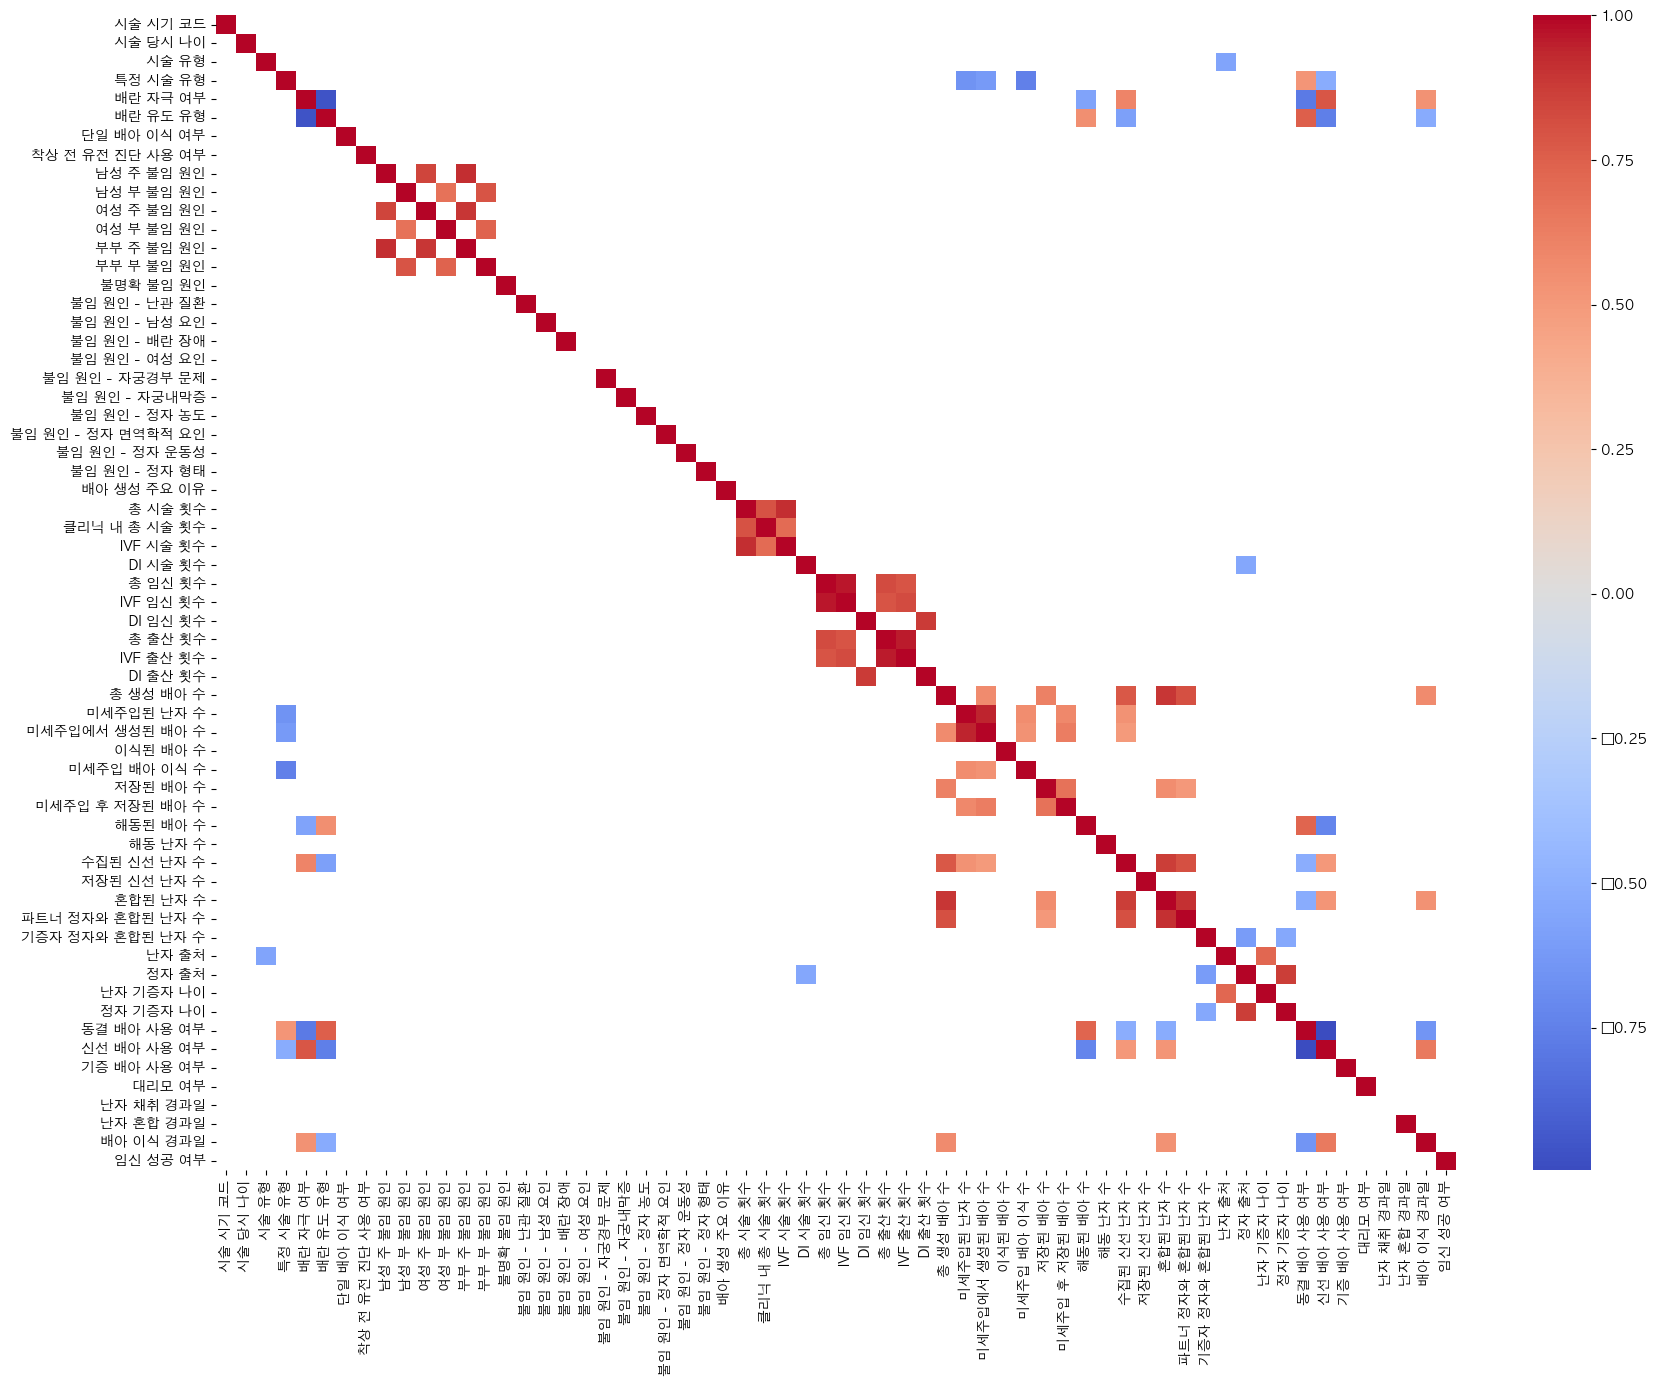

In [19]:
data = pd.concat([x_train, y_test])
threshold = 0.5
mask = np.abs(data.corr()) < threshold  # 0.5 미만인 값들을 True로 마스킹

plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, mask=mask)
plt.show()

### Feature Importance by RF

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [23]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
rf.fit(x_train, y_train)
preds = rf.predict_proba(x_val)[:, 1]
score = roc_auc_score(y_val, preds)


In [41]:
feat_iprt = pd.DataFrame([])
feat_iprt['Feature'] = rf.feature_names_in_
feat_iprt['Importance'] = rf.feature_importances_
feat_iprt.sort_values(by='Importance', ascending=False, inplace=True)

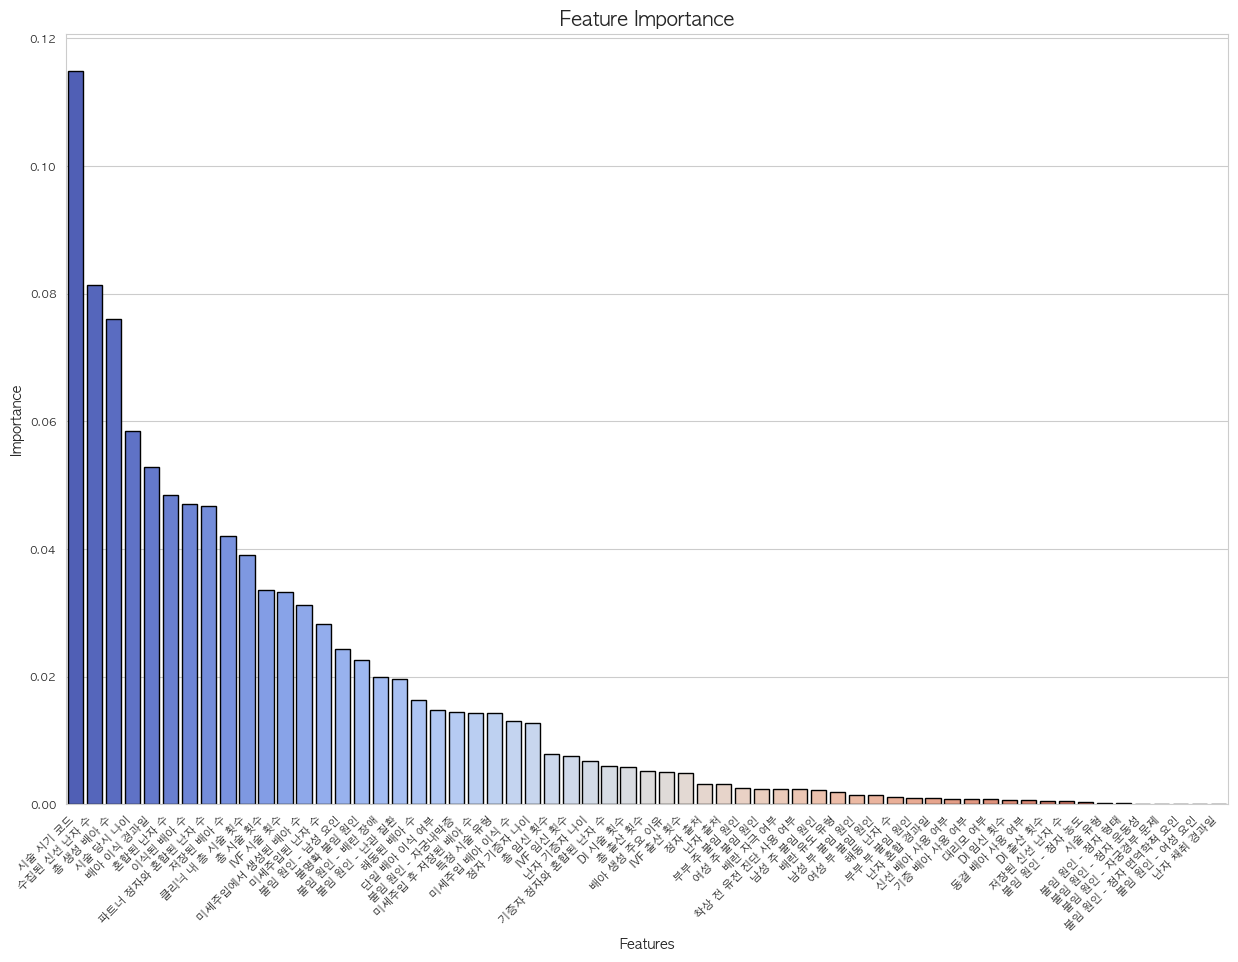

In [81]:
plt.figure(figsize=(15, 10))

sns.set_style("whitegrid")  # 배경을 그리드 스타일로 설정
sns.set_palette("viridis")  # 색상 팔레트 변경
plt.rcParams['font.family'] = 'AppleGothic' # Seborn 설정 이후 font 설정 필수

ax = sns.barplot(feat_iprt, x='Feature', y='Importance', palette="coolwarm", hue='Feature', legend=False)

# 막대 테두리 스타일 조정
for bar in ax.patches:
    bar.set_edgecolor("black")  # 막대 테두리 색상 추가

plt.xlabel("Features", fontsize = 10)
plt.xticks(fontsize=8, rotation=45, ha="right")
plt.yticks(fontsize=8)

plt.title("Feature Importance", fontsize=14, fontweight="bold")

plt.show()

In [161]:
col_name = '정자 출처'
thr = feat_iprt[feat_iprt.Feature == col_name].Importance.values[0]
print(f'Feature Selection 기준 : {col_name} - {thr}')

Feature Selection 기준 : 정자 출처 - 0.003196871007563806


In [171]:
seletected_Feature = feat_iprt[feat_iprt.Importance > thr].Feature.values
print(f'선택된 피쳐 수 : {len(seletected_Feature)}')
print(f'선택된 피쳐 : {seletected_Feature}')

선택된 피쳐 수 : 33
선택된 피쳐 : ['시술 시기 코드' '수집된 신선 난자 수' '총 생성 배아 수' '시술 당시 나이' '배아 이식 경과일' '혼합된 난자 수'
 '이식된 배아 수' '파트너 정자와 혼합된 난자 수' '저장된 배아 수' '클리닉 내 총 시술 횟수' '총 시술 횟수'
 'IVF 시술 횟수' '미세주입에서 생성된 배아 수' '미세주입된 난자 수' '불임 원인 - 남성 요인' '불명확 불임 원인'
 '불임 원인 - 배란 장애' '불임 원인 - 난관 질환' '해동된 배아 수' '단일 배아 이식 여부' '불임 원인 - 자궁내막증'
 '미세주입 후 저장된 배아 수' '특정 시술 유형' '미세주입 배아 이식 수' '정자 기증자 나이' '총 임신 횟수'
 'IVF 임신 횟수' '난자 기증자 나이' '기증자 정자와 혼합된 난자 수' 'DI 시술 횟수' '총 출산 횟수'
 '배아 생성 주요 이유' 'IVF 출산 횟수']


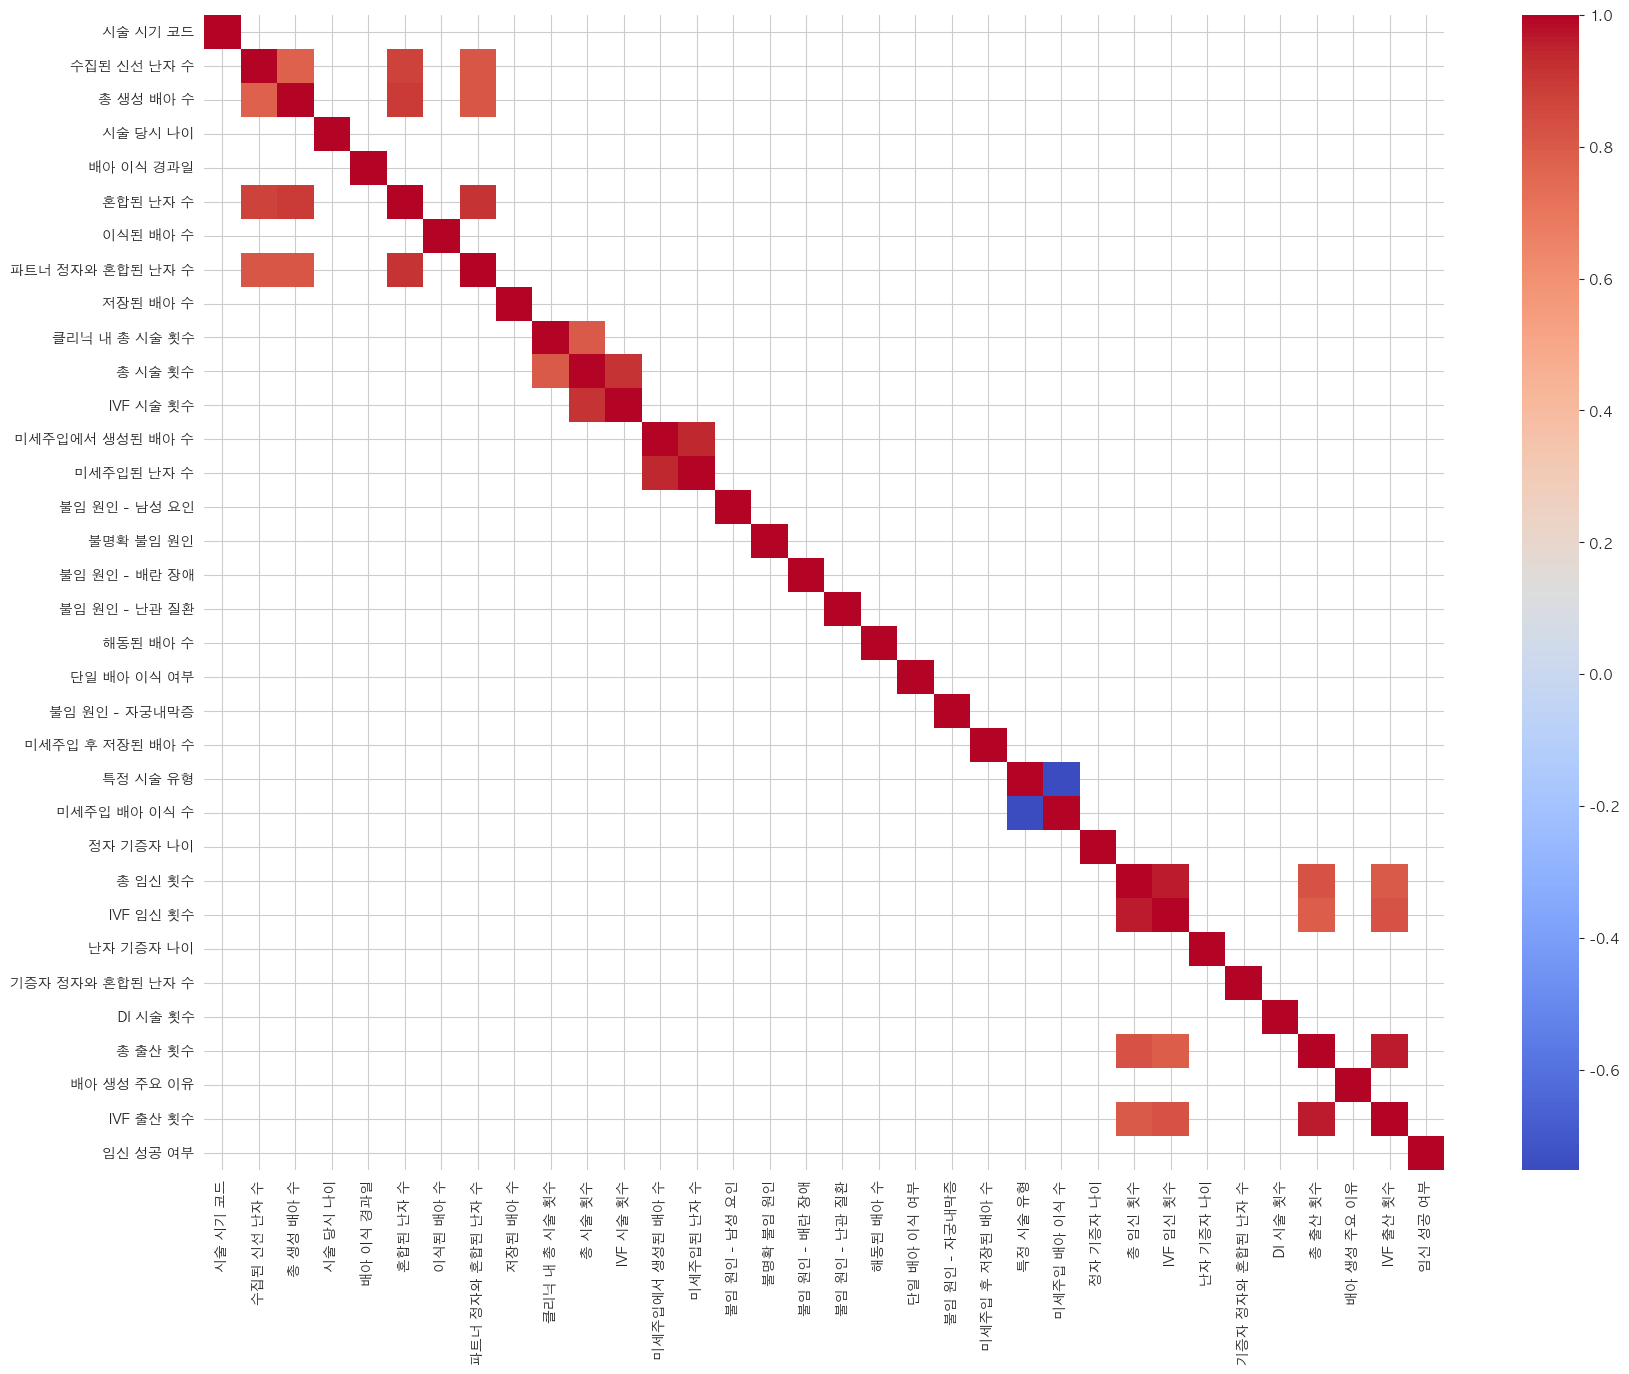

In [172]:
data = pd.concat([x_train[seletected_Feature], y_test])
threshold = 0.75
mask = np.abs(data.corr()) < threshold  # 0.5 미만인 값들을 True로 마스킹

plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, mask=mask)
plt.show()

In [183]:
# Corr에 기반한 피쳐 제거
seletected_Feature = set(seletected_Feature) - set(['수집된 신선 난자 수', '총 생성 배아 수', '총 임신 횟수', 'IVF 임신 횟수'])
print(f'선택된 피쳐 수 : {len(seletected_Feature)}')
print(f'선택된 피쳐 : {seletected_Feature}')
seletected_Feature = list(seletected_Feature)

선택된 피쳐 수 : 29
선택된 피쳐 : {'미세주입 배아 이식 수', 'IVF 출산 횟수', '미세주입 후 저장된 배아 수', '난자 기증자 나이', '불임 원인 - 남성 요인', 'IVF 시술 횟수', '단일 배아 이식 여부', '시술 시기 코드', '클리닉 내 총 시술 횟수', '이식된 배아 수', '혼합된 난자 수', '총 시술 횟수', '파트너 정자와 혼합된 난자 수', '미세주입에서 생성된 배아 수', 'DI 시술 횟수', '배아 이식 경과일', '불임 원인 - 배란 장애', '기증자 정자와 혼합된 난자 수', '해동된 배아 수', '시술 당시 나이', '불명확 불임 원인', '불임 원인 - 자궁내막증', '불임 원인 - 난관 질환', '정자 기증자 나이', '저장된 배아 수', '특정 시술 유형', '미세주입된 난자 수', '총 출산 횟수', '배아 생성 주요 이유'}


In [184]:
print(f'Train : {x_train.shape}, {y_train.shape}')
print(f'Validation : {x_val.shape}, {y_val.shape}')
print(f'Test : {x_test.shape}, {y_test.shape}')
print(f'Submission : {x_test_encoded.shape}')

Train : (205080, 61), (205080,)
Validation : (25635, 61), (25635,)
Test : (25636, 61), (25636,)
Submission : (90067, 61)


In [185]:
x_train_selected = x_train[seletected_Feature]
x_val_selected = x_val[seletected_Feature]
x_test_selected = x_test[seletected_Feature]
x_test_encoded_selected = x_test_encoded[seletected_Feature]

In [186]:
print(f'Train : {x_train_selected.shape}, {y_train.shape}')
print(f'Validation : {x_val_selected.shape}, {y_val.shape}')
print(f'Test : {x_test_selected.shape}, {y_test.shape}')
print(f'Submission : {x_test_encoded_selected.shape}')

Train : (205080, 29), (205080,)
Validation : (25635, 29), (25635,)
Test : (25636, 29), (25636,)
Submission : (90067, 29)


# Train

In [152]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
import optuna

In [191]:
def objective(trial):
    param = {
        'objective': 'binary',
        'metric': 'auc',
        'boosting_type': 'gbdt',
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'verbose' : -1,
        'early_stopping_rounds': 50,
        'n_jobs': -1
    }

    model = LGBMClassifier(**param)
    model.fit(x_train_selected, y_train, 
              eval_set=[(x_val_selected, y_val)], 
              eval_metric='auc',
              )
    preds = model.predict_proba(x_val_selected)[:, 1]
    return roc_auc_score(y_val, preds)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=30)

print("Best hyperparameters:", study.best_params)

[I 2025-02-10 13:16:44,036] A new study created in memory with name: no-name-102c8c14-b3b7-497b-a6b2-65d043819bb4


[I 2025-02-10 13:16:45,419] Trial 0 finished with value: 0.7350973623868555 and parameters: {'max_depth': 8, 'learning_rate': 0.124599657063657, 'n_estimators': 897, 'num_leaves': 125, 'subsample': 0.8481113210520501, 'colsample_bytree': 0.7561796643154142}. Best is trial 0 with value: 0.7350973623868555.
[I 2025-02-10 13:16:46,437] Trial 1 finished with value: 0.7333377054149314 and parameters: {'max_depth': 8, 'learning_rate': 0.2674610111666023, 'n_estimators': 751, 'num_leaves': 88, 'subsample': 0.9127544764566968, 'colsample_bytree': 0.8933799296436717}. Best is trial 0 with value: 0.7350973623868555.
[I 2025-02-10 13:16:48,172] Trial 2 finished with value: 0.734495998805579 and parameters: {'max_depth': 4, 'learning_rate': 0.1822928145774662, 'n_estimators': 329, 'num_leaves': 145, 'subsample': 0.9376037883423455, 'colsample_bytree': 0.6555917616496449}. Best is trial 0 with value: 0.7350973623868555.
[I 2025-02-10 13:16:51,218] Trial 3 finished with value: 0.7352206568569077 and

Best hyperparameters: {'max_depth': 10, 'learning_rate': 0.04856635535869172, 'n_estimators': 612, 'num_leaves': 62, 'subsample': 0.5037769296875161, 'colsample_bytree': 0.8261042143665004}


In [192]:
best_params = study.best_params
model = LGBMClassifier(**best_params, objective='binary', metric='auc', 
                        boosting_type='gbdt',verbosity=-1, n_jobs=-1, early_stopping_rounds=50)
model.fit(x_train_selected, y_train, eval_set=[(x_val_selected, y_val)], eval_metric='auc')

LGBMClassifier(colsample_bytree=0.8261042143665004, early_stopping_rounds=50,
               learning_rate=0.04856635535869172, max_depth=10, metric='auc',
               n_estimators=612, n_jobs=-1, num_leaves=62, objective='binary',
               subsample=0.5037769296875161, verbosity=-1)

# Inference

In [193]:
predict_proba_train = model.predict_proba(x_train_selected)
predict_proba_val = model.predict_proba(x_val_selected)
predict_proba_test = model.predict_proba(x_test_selected)

In [194]:
print(f'Train AUC : {roc_auc_score(y_train, predict_proba_train[:, 1])}')
print(f'Validation AUC : {roc_auc_score(y_val, predict_proba_val[:, 1])}')
print(f'Test AUC : {roc_auc_score(y_test, predict_proba_test[:, 1])}')

Train AUC : 0.7531389454870161
Validation AUC : 0.7358363090398266
Test AUC : 0.7393924846047725


LGBMClassifier(colsample_bytree=0.7965858042239695, early_stopping_rounds=50,  
                learning_rate=0.13167504038242184, max_depth=7, metric='auc',  
                n_estimators=504, n_jobs=-1, objective='binary',  
                subsample=0.9431219407440812, verbosity=-1)  
                
Train AUC : 0.7518993355373851  
Validation AUC : 0.737219485079001  
Test AUC : 0.7403759798863631  


#### Feature Selection
LGBMClassifier(colsample_bytree=0.6981694154946306, early_stopping_rounds=50,  
               learning_rate=0.08311361773370658, max_depth=4, metric='auc',  
               n_estimators=236, n_jobs=-1, num_leaves=60, objective='binary',  
               subsample=0.733104334558747, verbosity=-1)    

by RF(33개 feature)  
Train AUC : 0.7444729220259718  
Validation AUC : 0.7365872124461135  
Test AUC : 0.7405025748328549      

# Submission Prediction

In [126]:
pred_proba = model.predict_proba(x_test_encoded_selected)[:, 1]
submission = pd.read_csv(file_path + 'Data/sample_submission.csv')
submission['probability'] = pred_proba
submission.to_csv(file_path + 'Data/submission.csv', index=False)